In [1]:
using PyPlot

include("../src/linear_merging.jl")

fit_linear_merging (generic function with 1 method)

In [2]:
endpoint_values = rand(1:10, 6);

In [3]:
n = 500
k = length(endpoint_values) - 1
sigma = 1.0
y, ystar, X = generate_equal_size_linear_data(endpoint_values, n, sigma)

([2.1964127948274745, 4.810618691667177, 3.3472372796578784, 1.3893220393514483, 2.522260788513946, 2.5752201477048513, 4.206011762651766, 3.388445393181153, 2.202364625662264, 1.0149671933141182  …  3.734797231987729, 4.452726876677696, 5.003156954505963, 3.47077717123069, 3.856107563486569, 4.909688437240827, 3.400332756256744, 5.278567440408571, 5.5989275081339605, 4.4383642848501506], [3.0, 2.9797979797979797, 2.95959595959596, 2.9393939393939394, 2.919191919191919, 2.898989898989899, 2.878787878787879, 2.8585858585858586, 2.8383838383838382, 2.8181818181818183  …  4.636363636363637, 4.6767676767676765, 4.717171717171717, 4.757575757575758, 4.797979797979798, 4.838383838383838, 4.878787878787879, 4.91919191919192, 4.959595959595959, 5.0], [1.0 0.0; 1.0 0.002004008016032064; … ; 1.0 0.9979959919839679; 1.0 1.0])

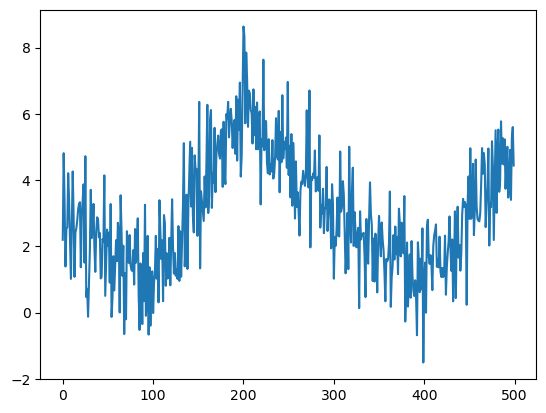

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1713b74f0>

In [4]:
plot(y)

In [5]:
yhat_partition = fit_linear_dp(X, y, k)

5-element Vector{LinearPiece}:
 LinearPiece(1, 92, [2.865006892587514, -9.643499831499906])
 LinearPiece(93, 208, [-4.535312737258652, 27.134759440658314])
 LinearPiece(209, 356, [11.30227518898954, -13.52763917065942])
 LinearPiece(357, 379, [-22.72197330681133, 33.52495552842613])
 LinearPiece(380, 500, [-13.340910137840917, 18.104866946714523])

In [6]:
yhat = partition_to_vector(X, yhat_partition);

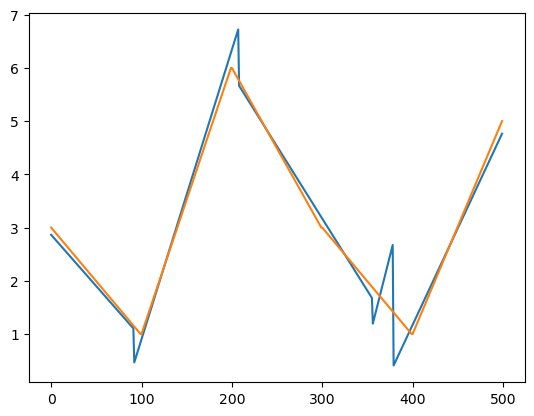

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1717c2dd0>

In [7]:
plot(yhat)
plot(ystar)

In [8]:
length(yhat)

500

In [9]:
mse(yhat, ystar)

0.05453432331618334

In [10]:
yhat_merging_partition = fit_linear_merging(X, y, sigma, 2 * k, k, initial_merging_size=2)

10-element Vector{LinearPiece}:
 LinearPiece(1, 26, [2.7376111047567946, 4.112647082211546])
 LinearPiece(27, 52, [0.5828913356600521, 17.891964083522474])
 LinearPiece(53, 84, [0.5396736001554346, 7.60354061277613])
 LinearPiece(85, 136, [-2.2532517308049353, 16.996644770092185])
 LinearPiece(137, 144, [-47.93301469596649, 183.83456152555905])
 LinearPiece(145, 152, [-36.035785478254766, 135.0182957267605])
 LinearPiece(153, 200, [-4.883660229777836, 27.662454406031877])
 LinearPiece(201, 268, [15.616254589541867, -22.5038391909264])
 LinearPiece(269, 396, [10.333991215604904, -11.865042291412449])
 LinearPiece(397, 500, [-14.423594213849372, 19.275154863313197])

In [11]:
yhat_merging = partition_to_vector(X, yhat_merging_partition);

In [12]:
mse(yhat_merging, ystar)

0.06839315418541222

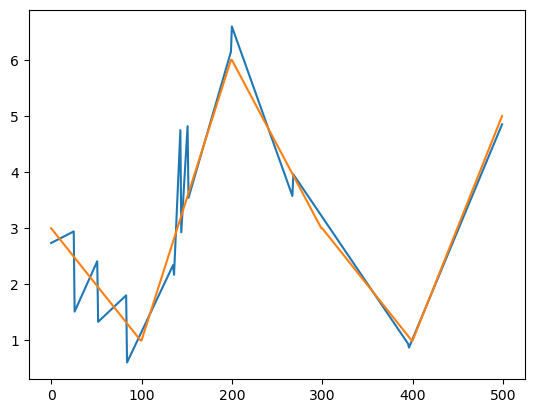

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x171b80f10>

In [13]:
plot(yhat_merging)
plot(ystar)